In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Load your dataset
data_csv = pd.read_csv('puf2022.csv')  # Make sure to replace 'path_to_your_dataset.csv' with the actual path to your dataset

# Assuming column "L" is the 'price' variable
price_column = data_csv.iloc[:, 11]
features = data_csv[['LOCATION', 'FOOTINGS', 'PIERS', 'LEASE', 'REGION']]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(features, price_column, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_pred = linear_model.predict(X_test)

# Performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R^2: {r2}')


RMSE: 49741.966383069324
R^2: 0.5867267296323343


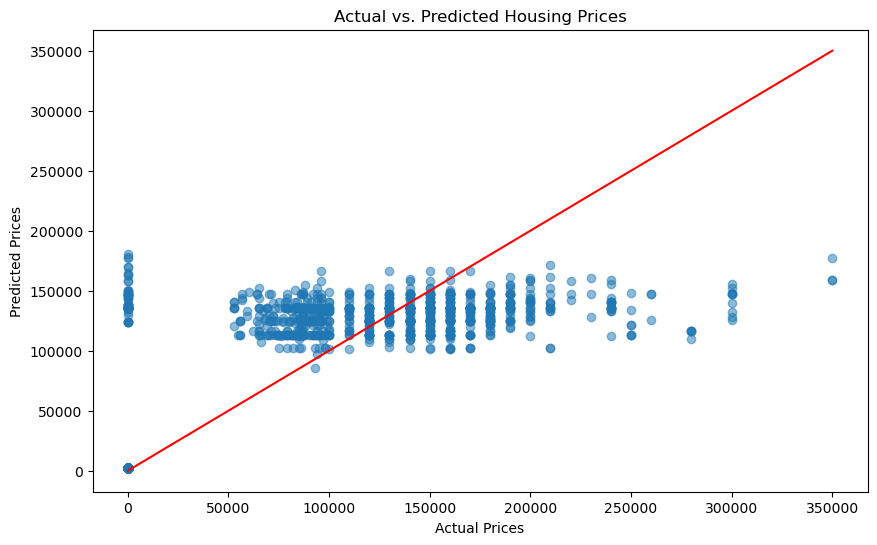

TypeError: residplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

<Figure size 1000x600 with 0 Axes>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Housing Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line for perfect predictions
plt.show()

# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(y_pred, residuals, lowess=True, color="g")
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

# Distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color="blue")
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()


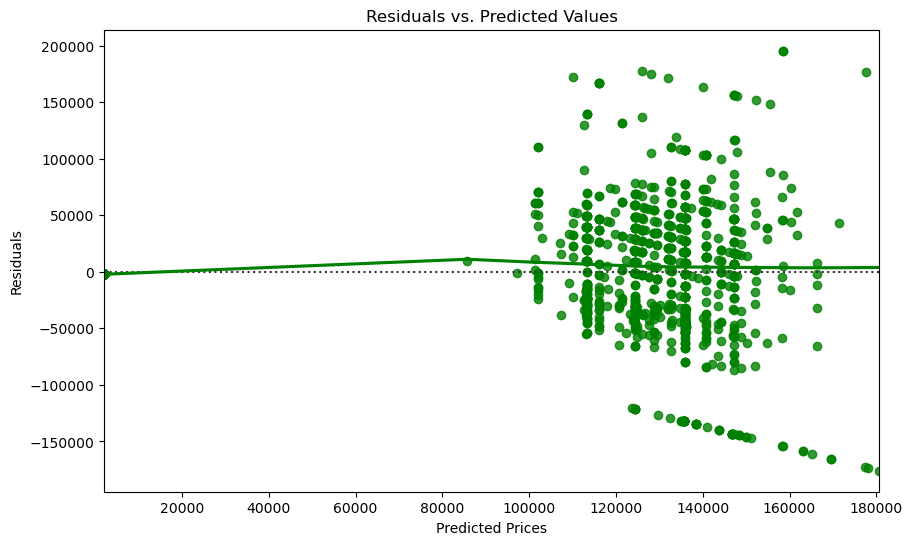

In [3]:
# Residuals plot with corrected argument passing
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color="g")
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


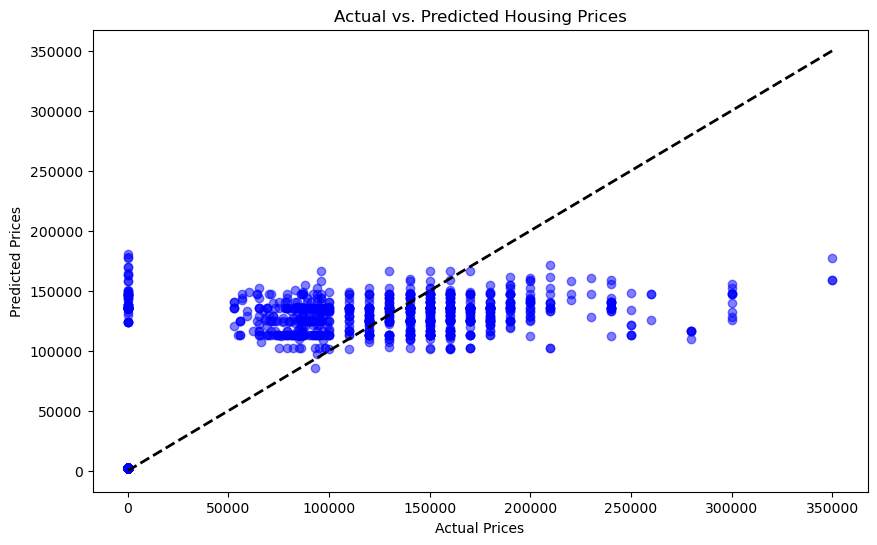

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')  # Plot actual vs predicted prices
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Housing Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Line of identity
plt.show()
